# ***Línea 144 - Grupo 2***


---
La Línea 144 brinda atención telefónica especializada a mujeres víctimas de violencia de género durante las 24 horas, los 365 días del año.
Ofrece información, contención y asesoramiento en aquellas temáticas relacionadas con la violencia física, psicológica, sexual, económica y patrimonial, y simbólica. Su objetivo es acompañar en las distintas situaciones, ya sea antes, durante o después de un episodio de violencia.
El dataset recopila la información recuperada de la página https://datos.gob.ar/ consolidando desde el 2020 hasta el 2023.

Dataset: https://www.kaggle.com/datasets/aracelifernandez/base-de-datos-linea-144-argentina<br>
Información de columnas: https://www.datos.gob.ar/dataset/generos-base-datos-linea-144/archivo/generos_1.4


El objetivo es analizar cómo han variado los casos de violencia a lo largo del tiempo, prestando especial atención a los períodos  durante y después de las restricciones de la pandemia. Determinar cuáles tipos de violencia (física, psicológica, sexual, económica, etc.) han mostrado mayores variaciones y en qué contexto (doméstica, institucional, laboral, etc.). Investigar cómo factores como la edad influyen en los tipos de violencia reportados. La idea es desarrollar modelos predictivos para anticipar posibles tendencias en la incidencia de violencia en los próximos años.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Linea 144.csv', delimiter = ',')

In [4]:
df

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,No,No,No,Otro,Varon,17569053
2,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
3,2023,1/1/2023,Entre Ríos,Mujer,28.0,NaN,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,1426426
4,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89535,2020,12/31/2020,Buenos Aires,Mujer,30.0,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
89536,2020,12/31/2020,Buenos Aires,Mujer,40.0,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
89537,2020,12/31/2020,Buenos Aires,Mujer,22.0,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
89538,2020,12/31/2020,Buenos Aires,Mujer,44.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


In [5]:
df.dtypes

Anio                                                   int64
Fecha                                                 object
prov_persona_en_situacion_violencia                   object
genero_persona_en_situacion_de_violencia              object
edad_persona_en_situacion_de_violencia               float64
pais_nacimiento_persona_en_situacion_de_violencia     object
tipo_de_violencia_fisica                              object
tipo_de_violencia_psicologica                         object
tipo_de_violencia_sexual                              object
tipo_de_violencia_economica_y_patrimonial             object
tipo_de_violencia_simbolica                           object
tipo_de_violencia_domestica                           object
modalidad_de_violencia_institucional                  object
modalidad_de_violencia_laboral                        object
modalidad_violencia_contra_libertad_reproductiva      object
modalidad_de_violencia_obstetrica                     object
modalidad_de_violencia_m

In [6]:
df.describe()

,Anio,edad_persona_en_situacion_de_violencia
count,89540.000000,72262.000000
mean,2021.165312,35.688079
std,1.012090,12.597016
min,2020.000000,1.000000
25%,2020.000000,27.000000
50%,2021.000000,34.000000
75%,2022.000000,42.000000
max,2023.000000,127.000000


La edad promedio de estas personas es de aproximadamente 35.69 años. La mínima registrada es de 1 año. En cuanto a la máxima es de 127 años, este valor es alto y podría ser un error de registro o una entrada atípica.
La mayor parte de las edades se concentra entre los 27 y 42 años (cuartiles 1 y 3), con una mediana de 34 años.


In [7]:
df.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,No,No,No,Otro,Varon,17569053
2,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
3,2023,1/1/2023,Entre Ríos,Mujer,28.0,NaN,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,1426426
4,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533


<Axes: >

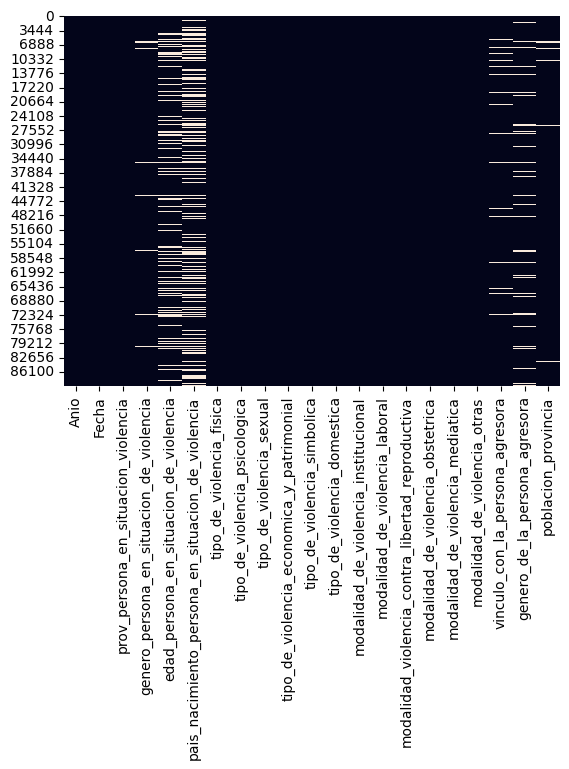

In [8]:
# Gráfico de valores faltantes
sns.heatmap(df.isnull(), cbar=False)

In [9]:
df.isna().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      1
genero_persona_en_situacion_de_violencia              1904
edad_persona_en_situacion_de_violencia               17278
pais_nacimiento_persona_en_situacion_de_violencia    30281
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

In [10]:
df.isna().sum()/df.shape[0] * 100

Anio                                                  0.000000
Fecha                                                 0.000000
prov_persona_en_situacion_violencia                   0.001117
genero_persona_en_situacion_de_violencia              2.126424
edad_persona_en_situacion_de_violencia               19.296404
pais_nacimiento_persona_en_situacion_de_violencia    33.818405
tipo_de_violencia_fisica                              0.000000
tipo_de_violencia_psicologica                         0.000000
tipo_de_violencia_sexual                              0.000000
tipo_de_violencia_economica_y_patrimonial             0.000000
tipo_de_violencia_simbolica                           0.000000
tipo_de_violencia_domestica                           0.000000
modalidad_de_violencia_institucional                  0.000000
modalidad_de_violencia_laboral                        0.000000
modalidad_violencia_contra_libertad_reproductiva      0.000000
modalidad_de_violencia_obstetrica                     0

# **Gráficos**

<ipython-input-11-554e705bae83>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorias_edades,palette="Set2")


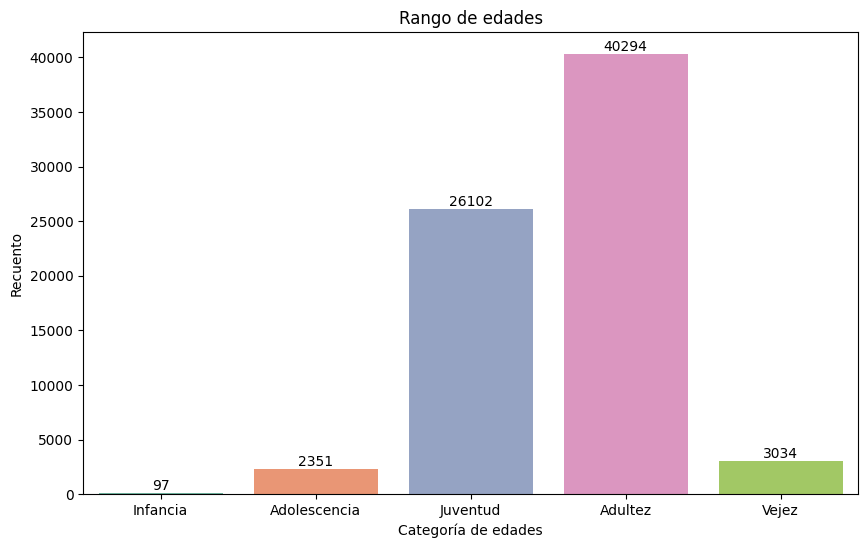

In [11]:
# Límites de los bins
bin = [5, 10, 18, 30, 60, 80]
# [5, 10], [10, 18], [18, 30], [30, 60], [60, 80]

labels = ["Infancia", "Adolescencia","Juventud", "Adultez", "Vejez"]

categorias_edades = pd.cut(df["edad_persona_en_situacion_de_violencia"], bins=bin, labels=labels)

# dataframe temporal
categorias_df = pd.DataFrame(categorias_edades, columns=['categorias_edades'])

# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(x=categorias_edades,palette="Set2")
plt.title('Rango de edades')
plt.ylabel('Recuento')
plt.xlabel('Categoría de edades')

counts = categorias_edades.value_counts().sort_index()
for i, v in enumerate(counts.values):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.show()

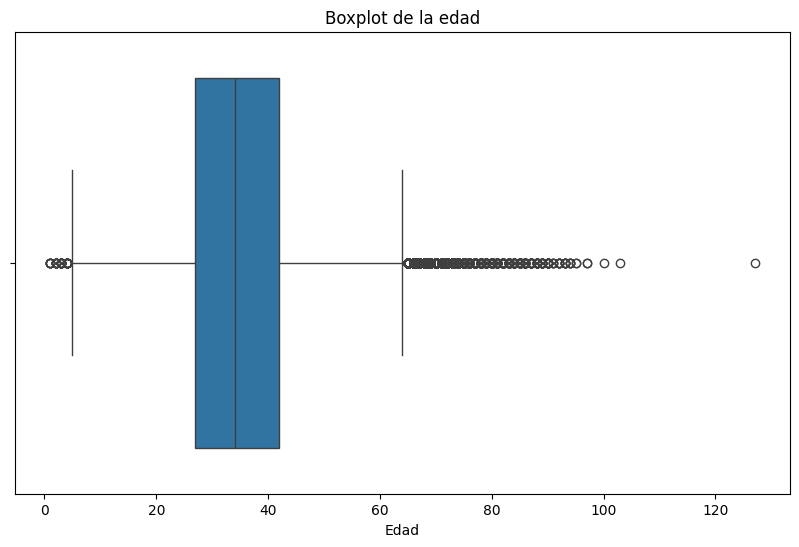

In [12]:
# Boxplot edad
plt.figure(figsize=(10, 6))
sns.boxplot(x='edad_persona_en_situacion_de_violencia',data=df)
plt.title('Boxplot de la edad')
plt.xlabel('Edad')
plt.show()

La línea en el medio de la caja representa la mediana de los datos en este caso es aproximadamente 35 años. La caja abarca desde el Q1 (percentil 25) hasta el Q3 (percentil 75). El tamaño de la caja indica el rango intercuartílico.
Se pueden apreciar varios ouliers, la mayoria por encima del máximo, que serán eliminados más adelante

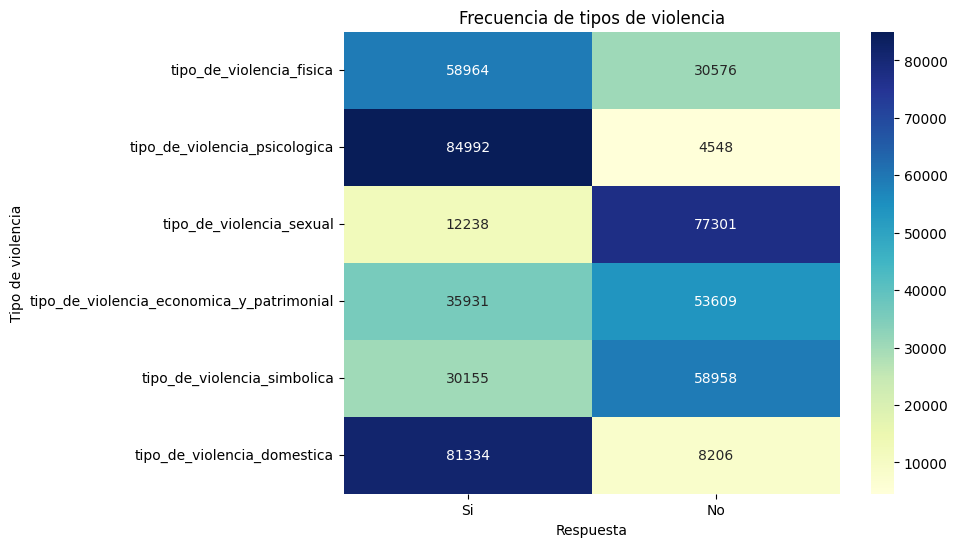

In [13]:
# Heatmap de tipos de violencia
df_tipos_violencia = df[['tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica']]
# Contar las frecuencias de 'Si' y 'No' para cada tipo de violencia
counts = df_tipos_violencia.apply(pd.Series.value_counts).T
counts = counts[['Si', 'No']].fillna(0)

# Gráfico
plt.figure(figsize=(8, 6))
# fmt g enteros sin formato específico de decimales
sns.heatmap(counts, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Frecuencia de tipos de violencia')
plt.xlabel('Respuesta')
plt.ylabel('Tipo de violencia')
plt.show()

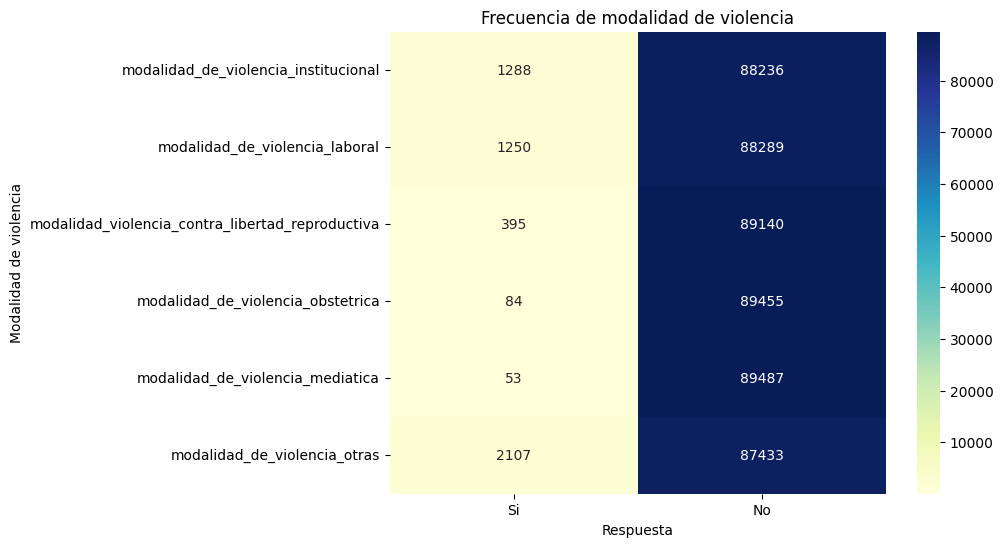

In [14]:
# Heatmap de modalidad de violencia
df_modalidad_violencia = df[['modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral', 'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras']]

counts = df_modalidad_violencia.apply(pd.Series.value_counts).T
counts = counts[['Si', 'No']].fillna(0)

# Gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(counts, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Frecuencia de modalidad de violencia')
plt.xlabel('Respuesta')
plt.ylabel('Modalidad de violencia')
plt.show()

Se puede observar que la mayoría de las modalidades no se cumplen, no se qué tanto servirá en futuras predicciones.

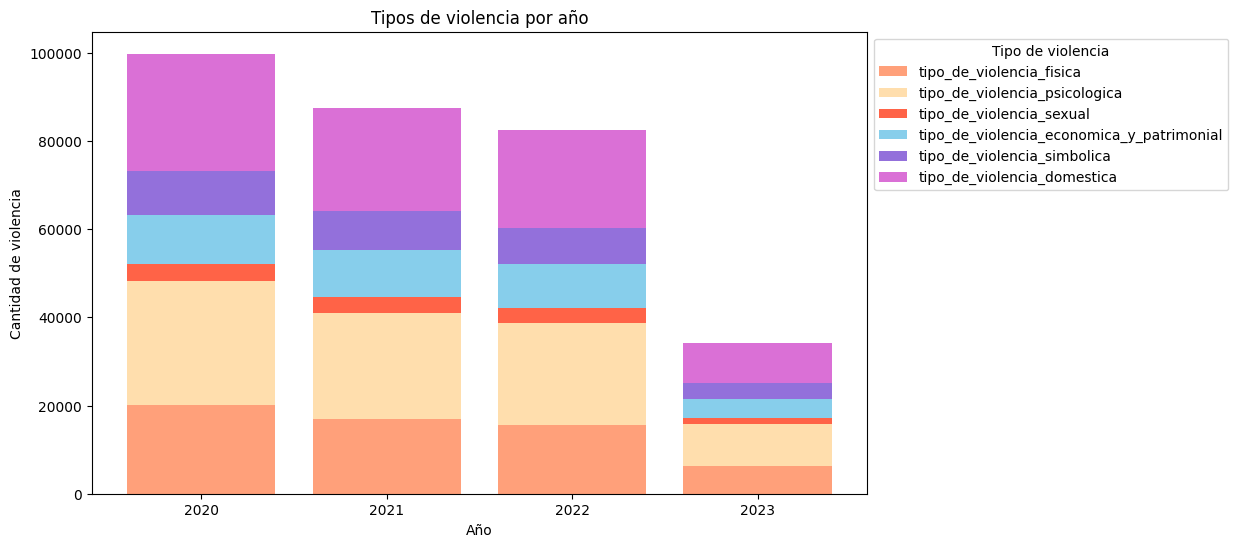

In [15]:
# Tipos de violencia por año
df_violencia = df[['Anio', 'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica']]

# Convertir "Si" a 1 y "No" a 0 en todas las columnas de tipo de violencia (antes de hacer dummies)
df_violencia_numerica = df_violencia.replace({'Si': 1,'SI': 1, 'No': 0})

df_agrupado = df_violencia_numerica.groupby('Anio').sum()

anios = df_agrupado.index
tipos_violencia = df_agrupado.columns

colores = ['lightsalmon', 'navajowhite', 'tomato', 'skyblue', 'mediumpurple', 'orchid']

# Gráfico
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(anios))
for i, tipo_violencia in enumerate(tipos_violencia):
    plt.bar(anios, df_agrupado[tipo_violencia], bottom=bottom, color=colores[i], label=tipo_violencia)
    bottom += df_agrupado[tipo_violencia]

plt.legend(title='Tipo de violencia', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Tipos de violencia por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de violencia')
plt.xticks(anios)
plt.show()

In [16]:
df['Anio'].value_counts()

Anio
2020    29706
2021    25301
2022    24558
2023     9975
Name: count, dtype: int64

# **Eliminar columnas**

In [17]:
# Elimina las filas donde todos sus datos son faltantes
df.dropna(axis=0,how='all',inplace=True)

# **Imputar datos**
* **Variables numericas:** media, mediana<br>
* **Variables categoricas:** moda<br>
* **k-nearest neighbors:** donde se estima el valor perdido como la media (en el caso de las variables numéricas) de los valores de los k vecinos u observaciones mas cercanos

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

##   **Género**



In [20]:
df['genero_persona_en_situacion_de_violencia'].unique()

array(['Mujer', 'Transgenero', 'Varon', nan, 'Varon Trans', 'Mujer Trans',
       'No Binarie', 'Otro', 'Travesti', 'Varon trans', 'Intersexual',
       'Varón Trans', 'Queer'], dtype=object)

In [21]:
df['genero_persona_en_situacion_de_violencia'].value_counts()

genero_persona_en_situacion_de_violencia
Mujer          86883
Varon            349
Transgenero      151
Mujer Trans      141
Otro              67
Varón Trans       13
Varon Trans       12
Travesti          11
Intersexual        4
No Binarie         3
Varon trans        1
Queer              1
Name: count, dtype: int64

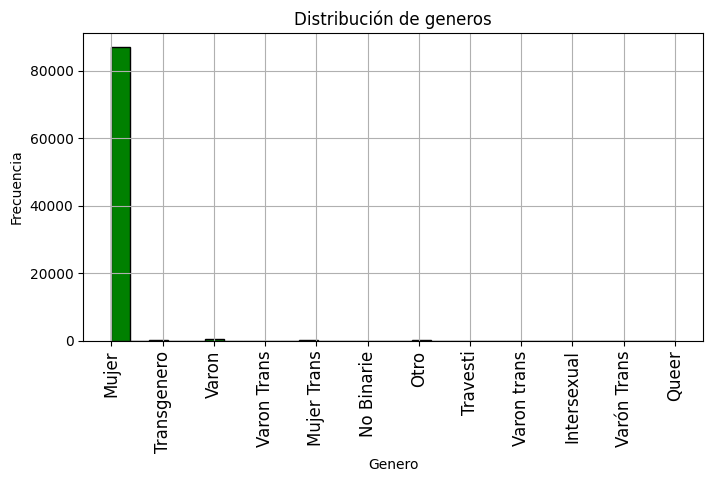

In [22]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['genero_persona_en_situacion_de_violencia'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribución de generos')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

Se podria quedar solo con los datos de las mujeres ya que son la mayoria.

In [23]:
genero_imputado = imputer_most_frequent.fit_transform(df[['genero_persona_en_situacion_de_violencia']])

In [24]:
df["genero_persona_en_situacion_de_violencia"].mode()

0    Mujer
Name: genero_persona_en_situacion_de_violencia, dtype: object

In [25]:
genero_imputado = genero_imputado.squeeze(axis=1)

In [26]:
genero_imputado.shape

(89540,)

In [27]:
genero_imputado.astype('object')

array(['Mujer', 'Mujer', 'Mujer', ..., 'Mujer', 'Mujer', 'Mujer'],
      dtype=object)

In [28]:
df["genero_persona_en_situacion_de_violencia"] = genero_imputado

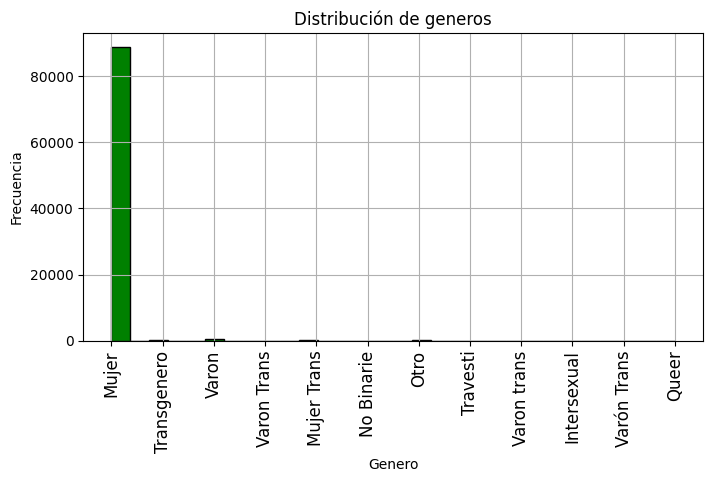

In [29]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['genero_persona_en_situacion_de_violencia'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribución de generos')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

In [30]:
df.isna().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      1
genero_persona_en_situacion_de_violencia                 0
edad_persona_en_situacion_de_violencia               17278
pais_nacimiento_persona_en_situacion_de_violencia    30281
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

##  **Provincia**

In [31]:
df['prov_persona_en_situacion_violencia'] = df['prov_persona_en_situacion_violencia'].replace('Sin Datos', np.nan)
df['prov_persona_en_situacion_violencia'] = df['prov_persona_en_situacion_violencia'].replace('Sin datos', np.nan)
df['prov_persona_en_situacion_violencia'] = df['prov_persona_en_situacion_violencia'].replace('Santiago Del Estero', 'Santiago del Estero')

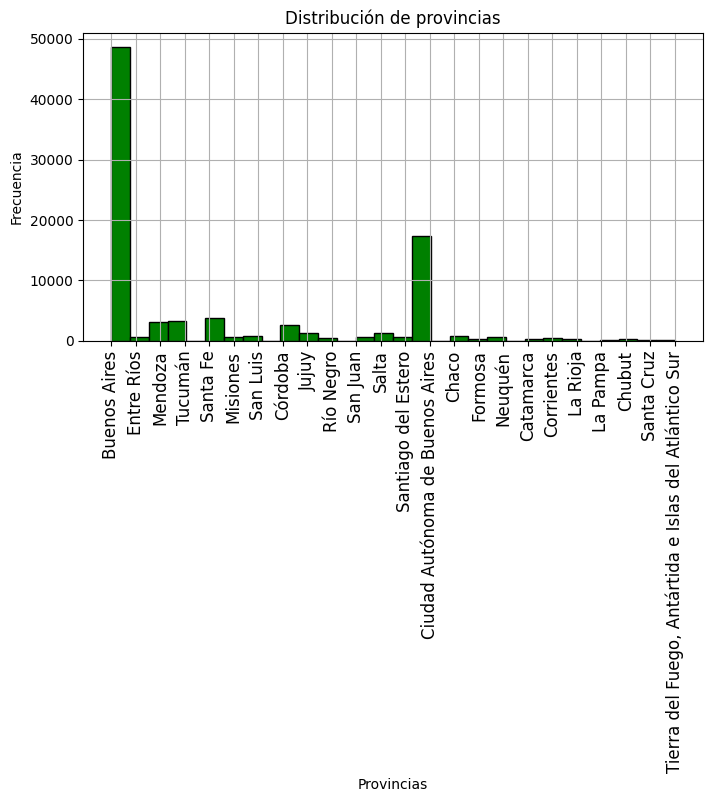

In [32]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['prov_persona_en_situacion_violencia'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribución de provincias')
plt.xlabel('Provincias')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

In [33]:
prov_imputado = imputer_most_frequent.fit_transform(df[['prov_persona_en_situacion_violencia']])

In [34]:
df["prov_persona_en_situacion_violencia"].mode()

0    Buenos Aires
Name: prov_persona_en_situacion_violencia, dtype: object

In [35]:
prov_imputado = prov_imputado.squeeze(axis=1)

In [36]:
df["prov_persona_en_situacion_violencia"] = prov_imputado

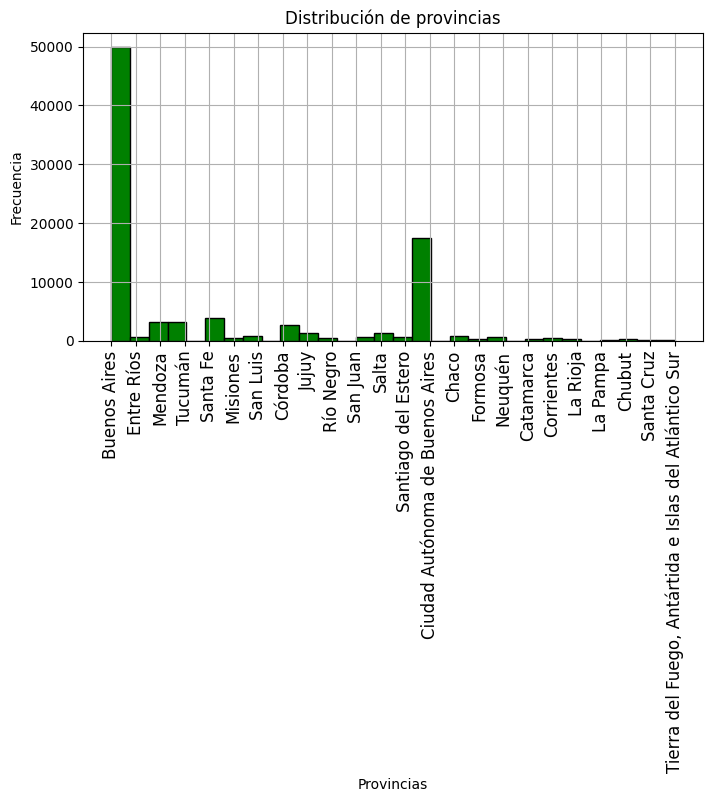

In [37]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['prov_persona_en_situacion_violencia'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribución de provincias')
plt.xlabel('Provincias')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

In [38]:
df.isna().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      0
genero_persona_en_situacion_de_violencia                 0
edad_persona_en_situacion_de_violencia               17278
pais_nacimiento_persona_en_situacion_de_violencia    30281
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

## **Edad**



Se intentó reemplazar por la media o mediana pero la distribución quedó distinta como se puede apreciar en los gráficos, por eso se dejarán los valores faltantes.

In [39]:
df['edad_persona_en_situacion_de_violencia'].unique()

array([ nan,  19.,  46.,  28.,  34.,  38.,  57.,  39.,  24.,  22.,  52.,
        65.,  26.,  41.,  44.,  40.,  27.,  42.,  25.,  49.,  15.,  23.,
        20.,   5.,  29.,  45.,  18.,  33.,  36.,  31.,  37.,  51.,  30.,
        17.,  35.,  48.,  32.,  43.,  55.,  59.,  50.,  21.,  53.,  54.,
        72.,  56.,  12.,  60.,  47.,  62.,  16.,  64.,  70.,  71.,  61.,
        68.,   7.,  66.,  67.,  58.,  74.,  79.,  73.,  13.,  10.,  76.,
        75.,  14.,   4.,  63.,  11.,  77.,  87.,  69.,  86.,   9.,  82.,
         8.,  88.,   2.,  80.,   1.,   3.,  78.,  85.,  84.,  92.,   6.,
        81.,  90.,  94.,  83.,  89., 103.,  93.,  91.,  95., 100.,  97.,
       127.])

In [40]:
df['edad_persona_en_situacion_de_violencia'].value_counts()

edad_persona_en_situacion_de_violencia
30.0     2843
28.0     2645
27.0     2597
32.0     2539
29.0     2523
         ... 
95.0        2
97.0        2
103.0       1
100.0       1
127.0       1
Name: count, Length: 99, dtype: int64

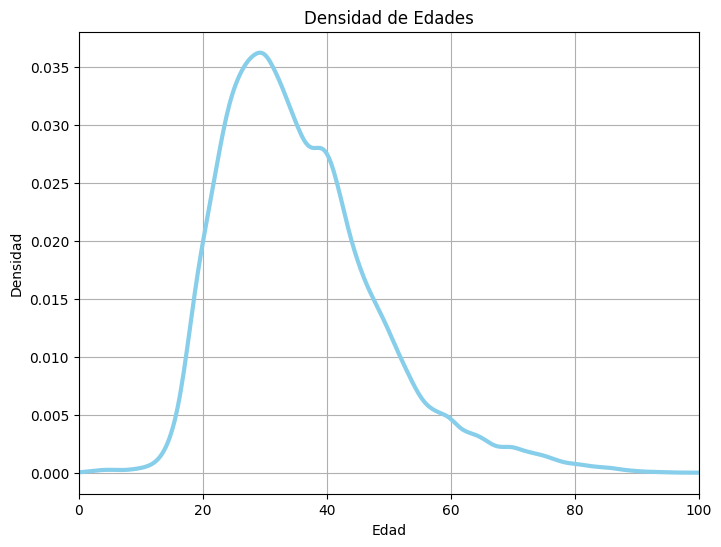

In [41]:
# GRAFICO DE DENSIDAD DE EDAD
plt.figure(figsize=(8, 6))
df['edad_persona_en_situacion_de_violencia'].dropna().plot(kind='density', color='skyblue', linewidth=3)
plt.xlim(0, 100)
plt.title('Densidad de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

In [42]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")

In [43]:
edad_imputado = imputer_mean.fit_transform(df[['edad_persona_en_situacion_de_violencia']])

In [44]:
df['edad_persona_en_situacion_de_violencia'].mean()

35.688079488527855

In [45]:
edad_imputado = pd.Series(edad_imputado.flatten())

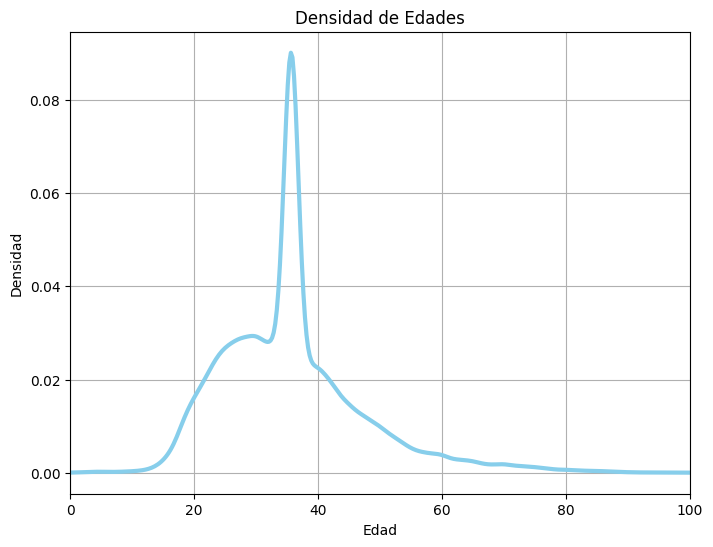

In [46]:
# GRAFICO DE DENSIDAD DE EDAD
plt.figure(figsize=(8, 6))
edad_imputado.plot(kind='density', color='skyblue', linewidth=3)
plt.xlim(0, 100)
plt.title('Densidad de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

Prueba de outliers

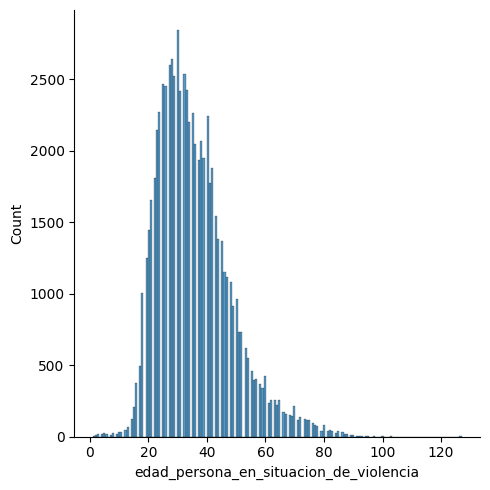

In [47]:
sns.displot(df['edad_persona_en_situacion_de_violencia'])

In [48]:
# Calcula el z-score para cada valor en el array. El z-score mide cuántas desviaciones estándar está cada valor por encima o por debajo de la media
# 0: Indica que el valor está en la media.
# Positivo: Indica que el valor está por encima de la media.
# Negativo: Indica que el valor está por debajo de la media.
z = stats.zscore(np.array(df['edad_persona_en_situacion_de_violencia'].dropna()))
print(z)

[-1.32477365  0.81860592 -0.6103138  ... -1.08662037  0.65983706
 -1.16600479]


In [49]:
df.isna().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      0
genero_persona_en_situacion_de_violencia                 0
edad_persona_en_situacion_de_violencia               17278
pais_nacimiento_persona_en_situacion_de_violencia    30281
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

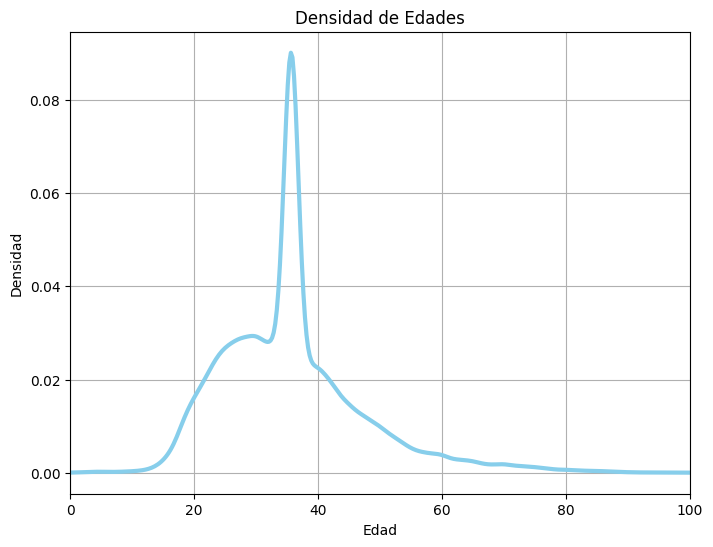

In [50]:
edad_imputado2 = imputer_mean.fit_transform(df[['edad_persona_en_situacion_de_violencia']])
edad_imputado2 = pd.Series(edad_imputado2.flatten())
# GRAFICO DE DENSIDAD DE EDAD
plt.figure(figsize=(8, 6))
edad_imputado2.plot(kind='density', color='skyblue', linewidth=3)
plt.xlim(0, 100)
plt.title('Densidad de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

In [51]:
# Rango Intercuartílico
# Elimina todos aquellos valores menores al primer cuartil menos 1.5 veces el RIC o mayores al tercer cuartil más 1.5 veces el RIC.
q1 = df['edad_persona_en_situacion_de_violencia'].quantile(0.25)
q3 = df['edad_persona_en_situacion_de_violencia'].quantile(0.75)
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)
df = df[(df['edad_persona_en_situacion_de_violencia'] > lb) & (df['edad_persona_en_situacion_de_violencia'] < ub)]
df.reset_index(drop=True, inplace=True)

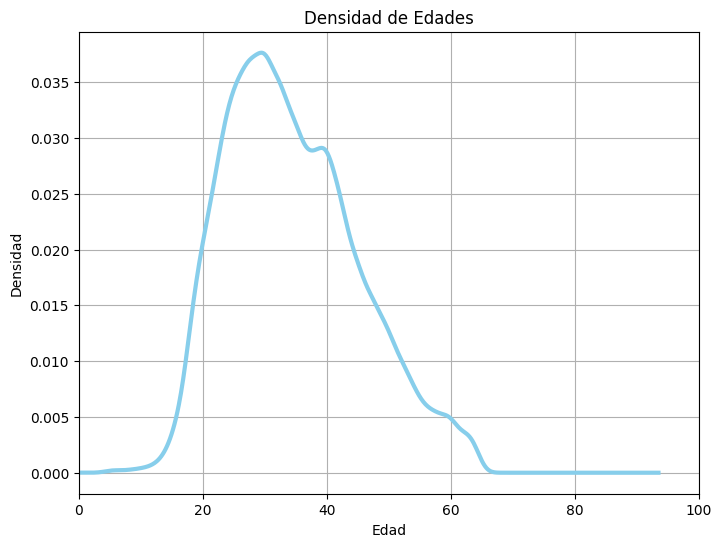

In [52]:
# GRAFICO DE DENSIDAD DE EDAD
plt.figure(figsize=(8, 6))
df['edad_persona_en_situacion_de_violencia'].plot(kind='density', color='skyblue', linewidth=3)
plt.xlim(0, 100)
plt.title('Densidad de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

In [53]:
df.isna().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      0
genero_persona_en_situacion_de_violencia                 0
edad_persona_en_situacion_de_violencia                   0
pais_nacimiento_persona_en_situacion_de_violencia    18489
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

##  **País de nacimiento**

In [54]:
df['pais_nacimiento_persona_en_situacion_de_violencia'].value_counts()

pais_nacimiento_persona_en_situacion_de_violencia
Argentina         46058
Paraguaya          2207
Boliviana          1085
Peruana             832
Venezolana          378
Colombiana          201
Uruguaya            153
Brasileña           107
Chilena             102
Otra                 81
Otro                 32
Dominicana           18
Ecuatoriana           9
Estadounidense        9
Mexicana              8
Española              8
Armenia               8
Alemana               7
Australiana           6
ARMENIA               5
Cubana                5
Salvadoreña           3
Belga                 2
Guatemalteca          2
Japonesa              2
Italiana              2
Arabe                 1
Panameña              1
Vietnamita            1
peruana               1
Rusa                  1
Israelí               1
Costarricense         1
Turca                 1
Griega                1
Nicaragüense          1
Palestina             1
Ucraniana             1
Francesa              1
Lituania      

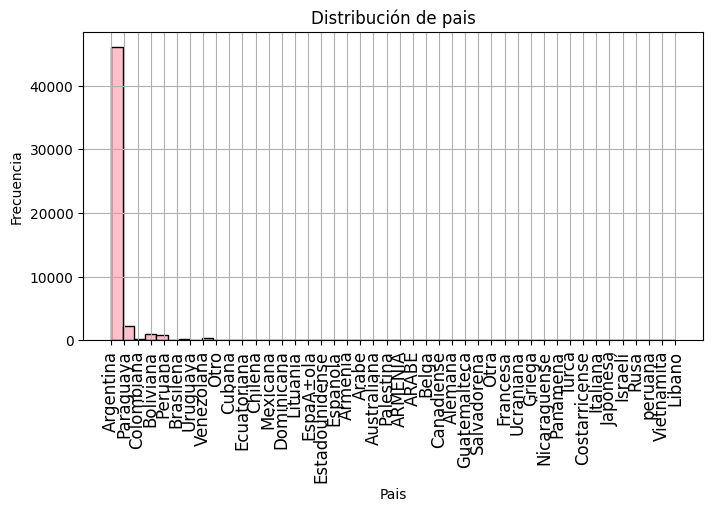

In [55]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['pais_nacimiento_persona_en_situacion_de_violencia'].dropna(), bins=50, color='pink', edgecolor='black')
plt.title('Distribución de pais')
plt.xlabel('Pais')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

Igual que con el género se podría quedar solo con Argentina.

In [56]:
pais_imputado = imputer_most_frequent.fit_transform(df[['pais_nacimiento_persona_en_situacion_de_violencia']])

In [57]:
df["pais_nacimiento_persona_en_situacion_de_violencia"].mode()

0    Argentina
Name: pais_nacimiento_persona_en_situacion_de_violencia, dtype: object

In [58]:
df["pais_nacimiento_persona_en_situacion_de_violencia"].unique()

array(['Argentina', nan, 'Paraguaya', 'Colombiana', 'Boliviana',
       'Peruana', 'Brasileña', 'Uruguaya', 'Venezolana', 'Otro', 'Cubana',
       'Ecuatoriana', 'Chilena', 'Mexicana', 'Dominicana', 'Lituania',
       'EspaÃ±ola', 'Estadounidense', 'Española', 'Armenia', 'Arabe',
       'Australiana', 'Palestina', 'ARMENIA', 'ARABE', 'Belga',
       'Canadiense', 'Alemana', 'Guatemalteca', 'Salvadoreña', 'Otra',
       'Francesa', 'Ucraniana', 'Griega', 'Nicaragüense', 'Panameña',
       'Turca', 'Costarricense', 'Italiana', 'Japonesa', 'Israelí',
       'Rusa', 'peruana', 'Vietnamita', 'Libano'], dtype=object)

In [59]:
pais_imputado = pais_imputado.squeeze(axis=1)

In [60]:
df["pais_nacimiento_persona_en_situacion_de_violencia"] = pais_imputado

<ipython-input-60-a585f687b087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pais_nacimiento_persona_en_situacion_de_violencia"] = pais_imputado


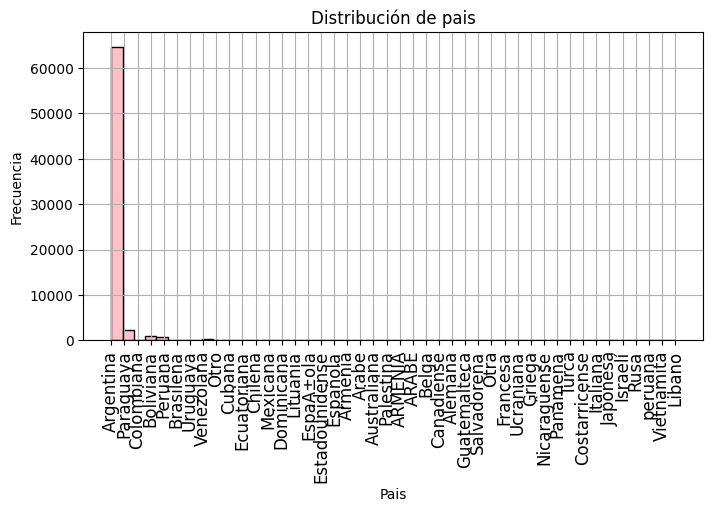

In [61]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['pais_nacimiento_persona_en_situacion_de_violencia'].dropna(), bins=50, color='pink', edgecolor='black')
plt.title('Distribución de pais')
plt.xlabel('Pais')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

In [62]:
df.isna().sum()

Anio                                                    0
Fecha                                                   0
prov_persona_en_situacion_violencia                     0
genero_persona_en_situacion_de_violencia                0
edad_persona_en_situacion_de_violencia                  0
pais_nacimiento_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                                0
tipo_de_violencia_psicologica                           0
tipo_de_violencia_sexual                                0
tipo_de_violencia_economica_y_patrimonial               0
tipo_de_violencia_simbolica                             0
tipo_de_violencia_domestica                             0
modalidad_de_violencia_institucional                    0
modalidad_de_violencia_laboral                          0
modalidad_violencia_contra_libertad_reproductiva        0
modalidad_de_violencia_obstetrica                       0
modalidad_de_violencia_mediatica                        0
modalidad_de_v

##  **Vínculo con el agresor**

In [63]:
df["vinculo_con_la_persona_agresora"].value_counts()

vinculo_con_la_persona_agresora
Ex pareja              34491
Pareja                 25399
Otro                    4979
Otro familiar           1969
Padre o tutor            964
Superior jerarquico      326
Madre o tutor            142
Name: count, dtype: int64

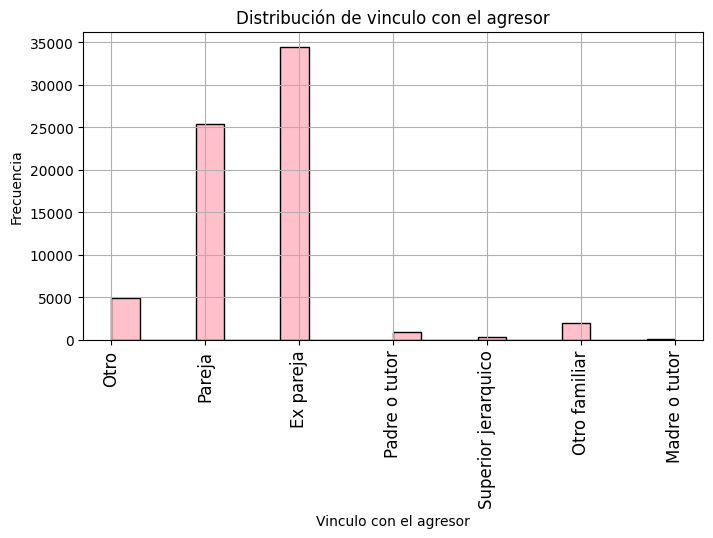

In [64]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['vinculo_con_la_persona_agresora'].dropna(), bins=20, color='pink', edgecolor='black')
plt.title('Distribución de vinculo con el agresor')
plt.xlabel('Vinculo con el agresor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

In [65]:
vinculo_imputado = imputer_most_frequent.fit_transform(df[['vinculo_con_la_persona_agresora']])

In [66]:
df["vinculo_con_la_persona_agresora"].mode()

0    Ex pareja
Name: vinculo_con_la_persona_agresora, dtype: object

In [67]:
vinculo_imputado = vinculo_imputado.squeeze(axis=1)

In [68]:
df["vinculo_con_la_persona_agresora"] = vinculo_imputado

<ipython-input-68-f78533c01190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vinculo_con_la_persona_agresora"] = vinculo_imputado


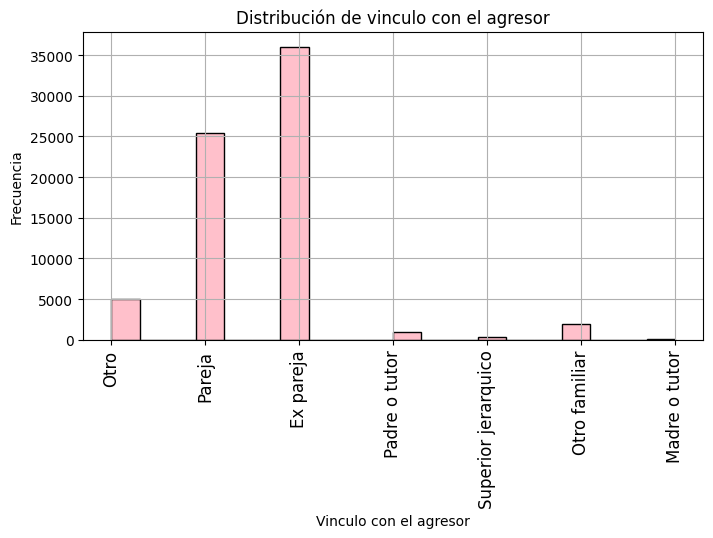

In [69]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['vinculo_con_la_persona_agresora'].dropna(), bins=20, color='pink', edgecolor='black')
plt.title('Distribución de vinculo con el agresor')
plt.xlabel('Vinculo con el agresor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

In [70]:
df.isna().sum()

Anio                                                    0
Fecha                                                   0
prov_persona_en_situacion_violencia                     0
genero_persona_en_situacion_de_violencia                0
edad_persona_en_situacion_de_violencia                  0
pais_nacimiento_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                                0
tipo_de_violencia_psicologica                           0
tipo_de_violencia_sexual                                0
tipo_de_violencia_economica_y_patrimonial               0
tipo_de_violencia_simbolica                             0
tipo_de_violencia_domestica                             0
modalidad_de_violencia_institucional                    0
modalidad_de_violencia_laboral                          0
modalidad_violencia_contra_libertad_reproductiva        0
modalidad_de_violencia_obstetrica                       0
modalidad_de_violencia_mediatica                        0
modalidad_de_v

## **Género del agresor**

In [71]:
df["genero_de_la_persona_agresora"].value_counts()

genero_de_la_persona_agresora
Varon          63928
Mujer            739
Otro             162
Varon Trans       13
Transgenero        9
Mujer Trans        8
Travesti           2
Varon trans        2
No Binarie         1
Queer              1
Name: count, dtype: int64

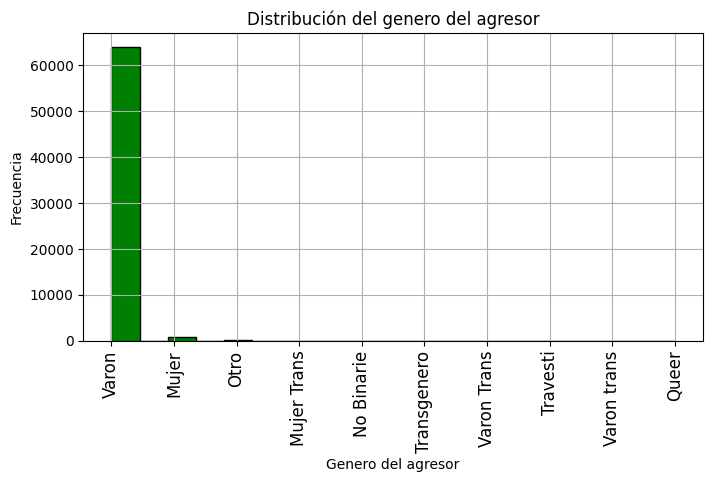

In [72]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['genero_de_la_persona_agresora'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribución del genero del agresor')
plt.xlabel('Genero del agresor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

Se podría también quedar con solo el agresor varón

In [73]:
genero_agresor_imputado = imputer_most_frequent.fit_transform(df[['genero_de_la_persona_agresora']])

In [74]:
df["genero_de_la_persona_agresora"].mode()

0    Varon
Name: genero_de_la_persona_agresora, dtype: object

In [75]:
genero_agresor_imputado = genero_agresor_imputado.squeeze(axis=1)

In [76]:
df["genero_de_la_persona_agresora"] = genero_agresor_imputado

<ipython-input-76-5f2b9ac6c8df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genero_de_la_persona_agresora"] = genero_agresor_imputado


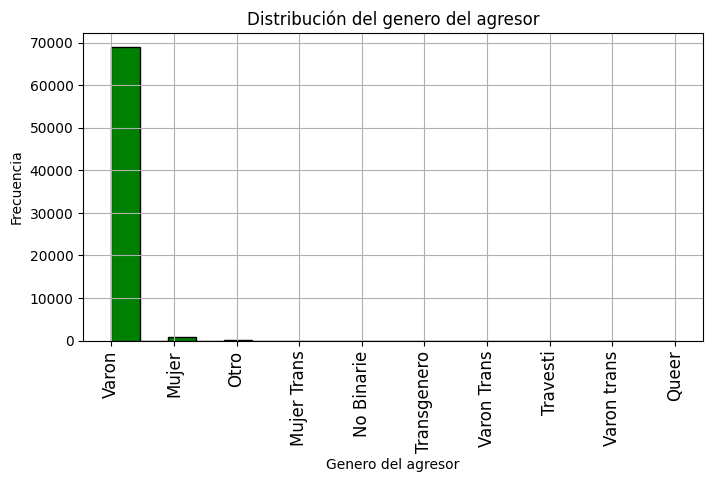

In [77]:
# HISTOGRAMA
plt.figure(figsize=(8, 4))
plt.hist(df['genero_de_la_persona_agresora'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribución del genero del agresor')
plt.xlabel('Genero del agresor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

In [78]:
df.isna().sum()

Anio                                                   0
Fecha                                                  0
prov_persona_en_situacion_violencia                    0
genero_persona_en_situacion_de_violencia               0
edad_persona_en_situacion_de_violencia                 0
pais_nacimiento_persona_en_situacion_de_violencia      0
tipo_de_violencia_fisica                               0
tipo_de_violencia_psicologica                          0
tipo_de_violencia_sexual                               0
tipo_de_violencia_economica_y_patrimonial              0
tipo_de_violencia_simbolica                            0
tipo_de_violencia_domestica                            0
modalidad_de_violencia_institucional                   0
modalidad_de_violencia_laboral                         0
modalidad_violencia_contra_libertad_reproductiva       0
modalidad_de_violencia_obstetrica                      0
modalidad_de_violencia_mediatica                       0
modalidad_de_violencia_otras   

## **Población provincia**

In [79]:
df

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,Si,Si,No,Si,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,Buenos Aires,Mujer,30.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
69833,2020,12/31/2020,Buenos Aires,Mujer,40.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
69834,2020,12/31/2020,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
69835,2020,12/31/2020,Buenos Aires,Mujer,44.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


In [80]:
# Los vacios se los cambia por la poblicacion correspondiente dependiendo la provincia
poblacion_provincia = df[['prov_persona_en_situacion_violencia','poblacion_provincia']]
unicos = df.groupby('prov_persona_en_situacion_violencia').agg({
    'poblacion_provincia': 'first'
}).reset_index()
print(unicos)

                  prov_persona_en_situacion_violencia poblacion_provincia
0                                        Buenos Aires            17569053
1                                           Catamarca              429556
2                                               Chaco        1,142,963.00
3                                              Chubut              603120
4                     Ciudad Autónoma de Buenos Aires             3120612
5                                          Corrientes             1197553
6                                             Córdoba        3,978,984.00
7                                          Entre Ríos             1426426
8                                             Formosa              606041
9                                               Jujuy              797955
10                                           La Pampa              366022
11                                           La Rioja              384607
12                                    

In [81]:
for i, row in poblacion_provincia.iterrows():
  if pd.isna(row['poblacion_provincia']):
      provincia = row['prov_persona_en_situacion_violencia']
      poblacion = unicos[unicos['prov_persona_en_situacion_violencia'] == provincia]['poblacion_provincia']
      poblacion_provincia.at[i, 'poblacion_provincia'] = poblacion


In [82]:
poblacion_provincia.isna().sum()

prov_persona_en_situacion_violencia    0
poblacion_provincia                    0
dtype: int64

In [83]:
df['poblacion_provincia'] = poblacion_provincia['poblacion_provincia']

<ipython-input-83-f3bc25a225d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poblacion_provincia'] = poblacion_provincia['poblacion_provincia']


In [84]:
df.isna().sum()

Anio                                                 0
Fecha                                                0
prov_persona_en_situacion_violencia                  0
genero_persona_en_situacion_de_violencia             0
edad_persona_en_situacion_de_violencia               0
pais_nacimiento_persona_en_situacion_de_violencia    0
tipo_de_violencia_fisica                             0
tipo_de_violencia_psicologica                        0
tipo_de_violencia_sexual                             0
tipo_de_violencia_economica_y_patrimonial            0
tipo_de_violencia_simbolica                          0
tipo_de_violencia_domestica                          0
modalidad_de_violencia_institucional                 0
modalidad_de_violencia_laboral                       0
modalidad_violencia_contra_libertad_reproductiva     0
modalidad_de_violencia_obstetrica                    0
modalidad_de_violencia_mediatica                     0
modalidad_de_violencia_otras                         0
vinculo_co

In [85]:
df['poblacion_provincia'] = df['poblacion_provincia'].astype(str)
df['poblacion_provincia'].replace("3,978,984.00",3978984,inplace=True)
df['poblacion_provincia'].replace('1,142,963.00',1142963,inplace=True)
df['poblacion_provincia'].replace("0    17569053\nName: poblacion_provincia, dtype: object",17569053,inplace=True)
df['poblacion_provincia'] = df['poblacion_provincia'].astype(dtype=int)

<ipython-input-85-b0caeb604ba9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poblacion_provincia'] = df['poblacion_provincia'].astype(str)
<ipython-input-85-b0caeb604ba9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poblacion_provincia'].replace("3,978,984.00",3978984,inplace=True)
<ipython-input-85-b0caeb604ba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [86]:
df.dtypes # No se guarda que poblacion provincia de convierte a int

Anio                                                   int64
Fecha                                                 object
prov_persona_en_situacion_violencia                   object
genero_persona_en_situacion_de_violencia              object
edad_persona_en_situacion_de_violencia               float64
pais_nacimiento_persona_en_situacion_de_violencia     object
tipo_de_violencia_fisica                              object
tipo_de_violencia_psicologica                         object
tipo_de_violencia_sexual                              object
tipo_de_violencia_economica_y_patrimonial             object
tipo_de_violencia_simbolica                           object
tipo_de_violencia_domestica                           object
modalidad_de_violencia_institucional                  object
modalidad_de_violencia_laboral                        object
modalidad_violencia_contra_libertad_reproductiva      object
modalidad_de_violencia_obstetrica                     object
modalidad_de_violencia_m

# **Transformación de variables categóricas**

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [88]:
# Codifica la categoria en valores numericos. Reemplaza la misma columna
label_encoder = LabelEncoder()

In [89]:
one_hot_encoder = OneHotEncoder()

## **Provincia**

In [90]:
provincia_encoder = LabelEncoder()

In [91]:
# Para evitar la creación de una columna por cada categoría, utilicé Label Encoder, ya que había demasiadas categorías
df['prov_persona_en_situacion_violencia'] = provincia_encoder.fit_transform(df['prov_persona_en_situacion_violencia'])

<ipython-input-91-cbf457f44439>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prov_persona_en_situacion_violencia'] = provincia_encoder.fit_transform(df['prov_persona_en_situacion_violencia'])


In [92]:
df['prov_persona_en_situacion_violencia'].head(10)

0     0
1     0
2     7
3    12
4     0
5     0
6    20
7    12
8    13
9    20
Name: prov_persona_en_situacion_violencia, dtype: int64

In [93]:
provincia_encoder.classes_

array(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut',
       'Ciudad Autónoma de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'Tucumán'],
      dtype=object)

## **Género**

In [94]:
df['genero_persona_en_situacion_de_violencia'].value_counts()

genero_persona_en_situacion_de_violencia
Mujer          69248
Varon            278
Transgenero      118
Mujer Trans      109
Otro              50
Varon Trans       10
Varón Trans       10
Travesti           7
No Binarie         3
Intersexual        3
Queer              1
Name: count, dtype: int64

In [95]:
genero_encoder = LabelEncoder()

In [96]:
df['genero_persona_en_situacion_de_violencia'] = genero_encoder.fit_transform(df['genero_persona_en_situacion_de_violencia'])

<ipython-input-96-e139aa3064c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genero_persona_en_situacion_de_violencia'] = genero_encoder.fit_transform(df['genero_persona_en_situacion_de_violencia'])


In [97]:
df['genero_persona_en_situacion_de_violencia'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: genero_persona_en_situacion_de_violencia, dtype: int64

In [98]:
genero_encoder.classes_

array(['Intersexual', 'Mujer', 'Mujer Trans', 'No Binarie', 'Otro',
       'Queer', 'Transgenero', 'Travesti', 'Varon', 'Varon Trans',
       'Varón Trans'], dtype=object)

## **País**

In [99]:
df['pais_nacimiento_persona_en_situacion_de_violencia'].value_counts()

pais_nacimiento_persona_en_situacion_de_violencia
Argentina         64547
Paraguaya          2207
Boliviana          1085
Peruana             832
Venezolana          378
Colombiana          201
Uruguaya            153
Brasileña           107
Chilena             102
Otra                 81
Otro                 32
Dominicana           18
Ecuatoriana           9
Estadounidense        9
Mexicana              8
Española              8
Armenia               8
Alemana               7
Australiana           6
ARMENIA               5
Cubana                5
Salvadoreña           3
Belga                 2
Guatemalteca          2
Japonesa              2
Italiana              2
Arabe                 1
Panameña              1
Vietnamita            1
peruana               1
Rusa                  1
Israelí               1
Costarricense         1
Turca                 1
Griega                1
Nicaragüense          1
Palestina             1
Ucraniana             1
Francesa              1
Lituania      

In [100]:
pais_encoder = LabelEncoder()
df['pais_nacimiento_persona_en_situacion_de_violencia'] = pais_encoder.fit_transform(df['pais_nacimiento_persona_en_situacion_de_violencia'])
print(df['pais_nacimiento_persona_en_situacion_de_violencia'].head(10))
print("Clases:",pais_encoder.classes_)

0     4
1     4
2     4
3     4
4    34
5     4
6     4
7     4
8     4
9     4
Name: pais_nacimiento_persona_en_situacion_de_violencia, dtype: int64
Clases: ['ARABE' 'ARMENIA' 'Alemana' 'Arabe' 'Argentina' 'Armenia' 'Australiana'
 'Belga' 'Boliviana' 'Brasileña' 'Canadiense' 'Chilena' 'Colombiana'
 'Costarricense' 'Cubana' 'Dominicana' 'Ecuatoriana' 'EspaÃ±ola'
 'Española' 'Estadounidense' 'Francesa' 'Griega' 'Guatemalteca' 'Israelí'
 'Italiana' 'Japonesa' 'Libano' 'Lituania' 'Mexicana' 'Nicaragüense'
 'Otra' 'Otro' 'Palestina' 'Panameña' 'Paraguaya' 'Peruana' 'Rusa'
 'Salvadoreña' 'Turca' 'Ucraniana' 'Uruguaya' 'Venezolana' 'Vietnamita'
 'peruana']


<ipython-input-100-f3fae79d2831>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pais_nacimiento_persona_en_situacion_de_violencia'] = pais_encoder.fit_transform(df['pais_nacimiento_persona_en_situacion_de_violencia'])


## **Violencia física**

In [101]:
df['tipo_de_violencia_fisica'].value_counts()

tipo_de_violencia_fisica
Si    47334
No    22503
Name: count, dtype: int64

In [102]:
# Utilicé dummies ya que solo generan una columna por cada categoría. Además, utilicé el tipo int para que los valores sean 0 o 1.
df[['violencia_fisica_No', 'violencia_fisica_Si']] = pd.get_dummies(df["tipo_de_violencia_fisica"], dtype = int)
df

<ipython-input-102-d537fa1d727a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_fisica_No', 'violencia_fisica_Si']] = pd.get_dummies(df["tipo_de_violencia_fisica"], dtype = int)
<ipython-input-102-d537fa1d727a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_fisica_No', 'violencia_fisica_Si']] = pd.get_dummies(df["tipo_de_violencia_fisica"], dtype = int)


,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_No,violencia_fisica_Si
0,2023,1/1/2023,0,1,19.0,4,Si,Si,Si,No,...,No,No,No,No,No,Otro,Varon,17569053,0,1
1,2023,1/1/2023,0,1,46.0,4,Si,Si,No,No,...,No,No,No,No,No,Pareja,Varon,17569053,0,1
2,2023,1/1/2023,7,1,28.0,4,No,Si,No,No,...,No,No,No,No,No,Pareja,Varon,1426426,1,0
3,2023,1/1/2023,12,1,34.0,4,No,Si,No,No,...,No,No,No,No,No,Ex pareja,Varon,2014533,1,0
4,2023,1/1/2023,0,1,38.0,34,Si,Si,No,Si,...,No,No,No,No,No,Ex pareja,Varon,17569053,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,0,1,30.0,4,Si,Si,No,No,...,No,No,No,No,No,Pareja,Varon,17569053,0,1
69833,2020,12/31/2020,0,1,40.0,4,Si,Si,No,No,...,No,No,No,No,No,Otro familiar,Otro,17569053,0,1
69834,2020,12/31/2020,0,1,22.0,4,Si,Si,No,No,...,No,No,No,No,No,Ex pareja,Varon,17569053,0,1
69835,2020,12/31/2020,0,1,44.0,4,Si,Si,No,No,...,No,No,No,No,No,Ex pareja,Varon,17569053,0,1


In [103]:
df.drop(columns='tipo_de_violencia_fisica',axis=1,inplace=True)
df

<ipython-input-103-15366f867b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='tipo_de_violencia_fisica',axis=1,inplace=True)


,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,...,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_No,violencia_fisica_Si
0,2023,1/1/2023,0,1,19.0,4,Si,Si,No,No,...,No,No,No,No,No,Otro,Varon,17569053,0,1
1,2023,1/1/2023,0,1,46.0,4,Si,No,No,Si,...,No,No,No,No,No,Pareja,Varon,17569053,0,1
2,2023,1/1/2023,7,1,28.0,4,Si,No,No,Si,...,No,No,No,No,No,Pareja,Varon,1426426,1,0
3,2023,1/1/2023,12,1,34.0,4,Si,No,No,No,...,No,No,No,No,No,Ex pareja,Varon,2014533,1,0
4,2023,1/1/2023,0,1,38.0,34,Si,No,Si,No,...,No,No,No,No,No,Ex pareja,Varon,17569053,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,0,1,30.0,4,Si,No,No,Si,...,No,No,No,No,No,Pareja,Varon,17569053,0,1
69833,2020,12/31/2020,0,1,40.0,4,Si,No,No,Si,...,No,No,No,No,No,Otro familiar,Otro,17569053,0,1
69834,2020,12/31/2020,0,1,22.0,4,Si,No,No,Si,...,No,No,No,No,No,Ex pareja,Varon,17569053,0,1
69835,2020,12/31/2020,0,1,44.0,4,Si,No,No,Si,...,No,No,No,No,No,Ex pareja,Varon,17569053,0,1


## **Violencia psicológica**

In [104]:
df['tipo_de_violencia_psicologica'].value_counts()

tipo_de_violencia_psicologica
Si    66882
No     2955
Name: count, dtype: int64

In [105]:
df[['violencia_psicologica_No', 'violencia_psicologica_Si']] = pd.get_dummies(df["tipo_de_violencia_psicologica"], dtype = int)
df.drop(columns='tipo_de_violencia_psicologica',axis=1,inplace=True)

<ipython-input-105-56a3c8b63cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_psicologica_No', 'violencia_psicologica_Si']] = pd.get_dummies(df["tipo_de_violencia_psicologica"], dtype = int)
<ipython-input-105-56a3c8b63cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_psicologica_No', 'violencia_psicologica_Si']] = pd.get_dummies(df["tipo_de_violencia_psicologica"], dtype = int)
<ipython-input-105-56a3c8b63cdd>:2: SettingWithCopyWarning: 
A value is trying to be set on 

In [106]:
df.columns

Index(['Anio', 'Fecha', 'prov_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'poblacion_provincia',
       'violencia_fisica_No', 'violencia_fisica_Si',
       'violencia_psicologica_No', 'violencia_psicologica_Si'],
      dtype='object')

## **Violencia sexual**

In [107]:
df['tipo_de_violencia_sexual'].replace("SI","Si",inplace=True)

<ipython-input-107-93c079ab2e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tipo_de_violencia_sexual'].replace("SI","Si",inplace=True)


In [108]:
df['tipo_de_violencia_sexual'].value_counts()

tipo_de_violencia_sexual
No    59285
Si    10552
Name: count, dtype: int64

In [109]:
df[['violencia_sexual_No', 'violencia_sexual_Si']] = pd.get_dummies(df["tipo_de_violencia_sexual"], dtype = int)

<ipython-input-109-6f5c742100e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_sexual_No', 'violencia_sexual_Si']] = pd.get_dummies(df["tipo_de_violencia_sexual"], dtype = int)
<ipython-input-109-6f5c742100e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_sexual_No', 'violencia_sexual_Si']] = pd.get_dummies(df["tipo_de_violencia_sexual"], dtype = int)


In [110]:
df.drop(columns='tipo_de_violencia_sexual',axis=1,inplace=True)

<ipython-input-110-551108dd2eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='tipo_de_violencia_sexual',axis=1,inplace=True)


## **Violencia económica y patrimonial**

In [111]:
df['tipo_de_violencia_economica_y_patrimonial'].value_counts()

tipo_de_violencia_economica_y_patrimonial
No    40221
Si    29616
Name: count, dtype: int64

In [112]:
df[['violencia_economica_patrimonial_No', 'violencia_economica_patrimonial_Si']] = pd.get_dummies(df["tipo_de_violencia_economica_y_patrimonial"], dtype = int)

<ipython-input-112-efc65db0b841>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_economica_patrimonial_No', 'violencia_economica_patrimonial_Si']] = pd.get_dummies(df["tipo_de_violencia_economica_y_patrimonial"], dtype = int)
<ipython-input-112-efc65db0b841>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_economica_patrimonial_No', 'violencia_economica_patrimonial_Si']] = pd.get_dummies(df["tipo_de_violencia_economica_y_patrimonial"], dtype = int)


In [113]:
df.drop(columns='tipo_de_violencia_economica_y_patrimonial',axis=1,inplace=True)

<ipython-input-113-e3e9aa5dcd91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='tipo_de_violencia_economica_y_patrimonial',axis=1,inplace=True)


## **Violencia simbólica**

In [114]:
df['tipo_de_violencia_simbolica'].replace("SI","Si",inplace=True)

<ipython-input-114-5123569405bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tipo_de_violencia_simbolica'].replace("SI","Si",inplace=True)


In [115]:
df['tipo_de_violencia_simbolica'].value_counts()

tipo_de_violencia_simbolica
No    45192
Si    24645
Name: count, dtype: int64

In [116]:
df[['violencia_simbolica_No', 'violencia_simbolica_Si']] = pd.get_dummies(df["tipo_de_violencia_simbolica"], dtype = int)
df.drop(columns='tipo_de_violencia_simbolica',axis=1,inplace=True)

<ipython-input-116-d62cbf4d677d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_simbolica_No', 'violencia_simbolica_Si']] = pd.get_dummies(df["tipo_de_violencia_simbolica"], dtype = int)
<ipython-input-116-d62cbf4d677d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_simbolica_No', 'violencia_simbolica_Si']] = pd.get_dummies(df["tipo_de_violencia_simbolica"], dtype = int)
<ipython-input-116-d62cbf4d677d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

## **Violencia doméstica**

In [117]:
df['tipo_de_violencia_domestica'].value_counts()

tipo_de_violencia_domestica
Si    64175
No     5662
Name: count, dtype: int64

In [118]:
df[['violencia_domestica_No', 'violencia_domestica_Si']] = pd.get_dummies(df["tipo_de_violencia_domestica"], dtype = int)

<ipython-input-118-6f868602e423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_domestica_No', 'violencia_domestica_Si']] = pd.get_dummies(df["tipo_de_violencia_domestica"], dtype = int)
<ipython-input-118-6f868602e423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['violencia_domestica_No', 'violencia_domestica_Si']] = pd.get_dummies(df["tipo_de_violencia_domestica"], dtype = int)


In [119]:
df.drop(columns='tipo_de_violencia_domestica',axis=1,inplace=True)

<ipython-input-119-1e05c011c4cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='tipo_de_violencia_domestica',axis=1,inplace=True)


## **Modalidad institucional**

In [120]:
df['modalidad_de_violencia_institucional'].replace("SI","Si",inplace=True)

<ipython-input-120-33762feedd4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modalidad_de_violencia_institucional'].replace("SI","Si",inplace=True)


In [121]:
df['modalidad_de_violencia_institucional'].value_counts()

modalidad_de_violencia_institucional
No    68783
Si     1054
Name: count, dtype: int64

In [122]:
df[['modalidad_institucional_No', 'modalidad_institucional_Si']] = pd.get_dummies(df["modalidad_de_violencia_institucional"], dtype = int)
df.drop(columns='modalidad_de_violencia_institucional',axis=1,inplace=True)

<ipython-input-122-659c70a7fb38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_institucional_No', 'modalidad_institucional_Si']] = pd.get_dummies(df["modalidad_de_violencia_institucional"], dtype = int)
<ipython-input-122-659c70a7fb38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_institucional_No', 'modalidad_institucional_Si']] = pd.get_dummies(df["modalidad_de_violencia_institucional"], dtype = int)
<ipython-input-122-659c70a7fb38>:2: SettingWithCopyWarning: 
A value i

In [123]:
df

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,...,violencia_sexual_No,violencia_sexual_Si,violencia_economica_patrimonial_No,violencia_economica_patrimonial_Si,violencia_simbolica_No,violencia_simbolica_Si,violencia_domestica_No,violencia_domestica_Si,modalidad_institucional_No,modalidad_institucional_Si
0,2023,1/1/2023,0,1,19.0,4,No,No,No,No,...,0,1,1,0,1,0,1,0,1,0
1,2023,1/1/2023,0,1,46.0,4,No,No,No,No,...,1,0,1,0,0,1,0,1,1,0
2,2023,1/1/2023,7,1,28.0,4,No,No,No,No,...,1,0,1,0,0,1,0,1,1,0
3,2023,1/1/2023,12,1,34.0,4,No,No,No,No,...,1,0,1,0,1,0,0,1,1,0
4,2023,1/1/2023,0,1,38.0,34,No,No,No,No,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,0,1,30.0,4,No,No,No,No,...,1,0,1,0,0,1,0,1,1,0
69833,2020,12/31/2020,0,1,40.0,4,No,No,No,No,...,1,0,1,0,0,1,0,1,1,0
69834,2020,12/31/2020,0,1,22.0,4,No,No,No,No,...,1,0,1,0,0,1,0,1,1,0
69835,2020,12/31/2020,0,1,44.0,4,No,No,No,No,...,1,0,1,0,0,1,0,1,1,0


## **Modalidad laboral**

In [124]:
df['modalidad_de_violencia_laboral'].replace("SI","Si",inplace=True)

<ipython-input-124-83715032d4b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modalidad_de_violencia_laboral'].replace("SI","Si",inplace=True)


In [125]:
df['modalidad_de_violencia_laboral'].value_counts()

modalidad_de_violencia_laboral
No    68923
Si      914
Name: count, dtype: int64

In [126]:
df[['modalidad_laboral_No', 'modalidad_laboral_Si']] = pd.get_dummies(df["modalidad_de_violencia_laboral"], dtype = int)
df.drop(columns='modalidad_de_violencia_laboral',axis=1,inplace=True)

<ipython-input-126-1cb52a60caf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_laboral_No', 'modalidad_laboral_Si']] = pd.get_dummies(df["modalidad_de_violencia_laboral"], dtype = int)
<ipython-input-126-1cb52a60caf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_laboral_No', 'modalidad_laboral_Si']] = pd.get_dummies(df["modalidad_de_violencia_laboral"], dtype = int)
<ipython-input-126-1cb52a60caf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [127]:
df

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,...,violencia_economica_patrimonial_No,violencia_economica_patrimonial_Si,violencia_simbolica_No,violencia_simbolica_Si,violencia_domestica_No,violencia_domestica_Si,modalidad_institucional_No,modalidad_institucional_Si,modalidad_laboral_No,modalidad_laboral_Si
0,2023,1/1/2023,0,1,19.0,4,No,No,No,No,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,0,1,46.0,4,No,No,No,No,...,1,0,0,1,0,1,1,0,1,0
2,2023,1/1/2023,7,1,28.0,4,No,No,No,No,...,1,0,0,1,0,1,1,0,1,0
3,2023,1/1/2023,12,1,34.0,4,No,No,No,No,...,1,0,1,0,0,1,1,0,1,0
4,2023,1/1/2023,0,1,38.0,34,No,No,No,No,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,0,1,30.0,4,No,No,No,No,...,1,0,0,1,0,1,1,0,1,0
69833,2020,12/31/2020,0,1,40.0,4,No,No,No,No,...,1,0,0,1,0,1,1,0,1,0
69834,2020,12/31/2020,0,1,22.0,4,No,No,No,No,...,1,0,0,1,0,1,1,0,1,0
69835,2020,12/31/2020,0,1,44.0,4,No,No,No,No,...,1,0,0,1,0,1,1,0,1,0


## **Modalidad contra la libertad reproductiva**

In [128]:
df['modalidad_violencia_contra_libertad_reproductiva'].replace("SI","Si",inplace=True)

<ipython-input-128-6f233b673968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modalidad_violencia_contra_libertad_reproductiva'].replace("SI","Si",inplace=True)


In [129]:
df['modalidad_violencia_contra_libertad_reproductiva'].value_counts()

modalidad_violencia_contra_libertad_reproductiva
No    69473
Si      364
Name: count, dtype: int64

In [130]:
df[['modalidad_violencia_contra_libertad_reproductiva_No', 'modalidad_violencia_contra_libertad_reproductiva_Si']] = pd.get_dummies(df["modalidad_violencia_contra_libertad_reproductiva"], dtype = int)
df.drop(columns='modalidad_violencia_contra_libertad_reproductiva',axis=1,inplace=True)

<ipython-input-130-aa485f484e42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_violencia_contra_libertad_reproductiva_No', 'modalidad_violencia_contra_libertad_reproductiva_Si']] = pd.get_dummies(df["modalidad_violencia_contra_libertad_reproductiva"], dtype = int)
<ipython-input-130-aa485f484e42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_violencia_contra_libertad_reproductiva_No', 'modalidad_violencia_contra_libertad_reproductiva_Si']] = pd.get_dummies(df["modalidad_v

In [131]:
df

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,...,violencia_simbolica_No,violencia_simbolica_Si,violencia_domestica_No,violencia_domestica_Si,modalidad_institucional_No,modalidad_institucional_Si,modalidad_laboral_No,modalidad_laboral_Si,modalidad_violencia_contra_libertad_reproductiva_No,modalidad_violencia_contra_libertad_reproductiva_Si
0,2023,1/1/2023,0,1,19.0,4,No,No,No,Otro,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,0,1,46.0,4,No,No,No,Pareja,...,0,1,0,1,1,0,1,0,1,0
2,2023,1/1/2023,7,1,28.0,4,No,No,No,Pareja,...,0,1,0,1,1,0,1,0,1,0
3,2023,1/1/2023,12,1,34.0,4,No,No,No,Ex pareja,...,1,0,0,1,1,0,1,0,1,0
4,2023,1/1/2023,0,1,38.0,34,No,No,No,Ex pareja,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,0,1,30.0,4,No,No,No,Pareja,...,0,1,0,1,1,0,1,0,1,0
69833,2020,12/31/2020,0,1,40.0,4,No,No,No,Otro familiar,...,0,1,0,1,1,0,1,0,1,0
69834,2020,12/31/2020,0,1,22.0,4,No,No,No,Ex pareja,...,0,1,0,1,1,0,1,0,1,0
69835,2020,12/31/2020,0,1,44.0,4,No,No,No,Ex pareja,...,0,1,0,1,1,0,1,0,1,0


## **Modalidad obstetrica**

In [132]:
df['modalidad_de_violencia_obstetrica'].replace("SI","Si",inplace=True)

<ipython-input-132-96c9a3ed301c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modalidad_de_violencia_obstetrica'].replace("SI","Si",inplace=True)


In [133]:
df['modalidad_de_violencia_obstetrica'].value_counts()

modalidad_de_violencia_obstetrica
No    69771
Si       66
Name: count, dtype: int64

In [134]:
df[['modalidad_de_violencia_obstetrica_No', 'modalidad_de_violencia_obstetrica_Si']] = pd.get_dummies(df["modalidad_de_violencia_obstetrica"], dtype = int)
df.drop(columns='modalidad_de_violencia_obstetrica',axis=1,inplace=True)

<ipython-input-134-fd556a676289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_de_violencia_obstetrica_No', 'modalidad_de_violencia_obstetrica_Si']] = pd.get_dummies(df["modalidad_de_violencia_obstetrica"], dtype = int)
<ipython-input-134-fd556a676289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_de_violencia_obstetrica_No', 'modalidad_de_violencia_obstetrica_Si']] = pd.get_dummies(df["modalidad_de_violencia_obstetrica"], dtype = int)
<ipython-input-134-fd556a676289>:2: 

In [135]:
df

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,...,violencia_domestica_No,violencia_domestica_Si,modalidad_institucional_No,modalidad_institucional_Si,modalidad_laboral_No,modalidad_laboral_Si,modalidad_violencia_contra_libertad_reproductiva_No,modalidad_violencia_contra_libertad_reproductiva_Si,modalidad_de_violencia_obstetrica_No,modalidad_de_violencia_obstetrica_Si
0,2023,1/1/2023,0,1,19.0,4,No,No,Otro,Varon,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,0,1,46.0,4,No,No,Pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
2,2023,1/1/2023,7,1,28.0,4,No,No,Pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
3,2023,1/1/2023,12,1,34.0,4,No,No,Ex pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
4,2023,1/1/2023,0,1,38.0,34,No,No,Ex pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,0,1,30.0,4,No,No,Pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
69833,2020,12/31/2020,0,1,40.0,4,No,No,Otro familiar,Otro,...,0,1,1,0,1,0,1,0,1,0
69834,2020,12/31/2020,0,1,22.0,4,No,No,Ex pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
69835,2020,12/31/2020,0,1,44.0,4,No,No,Ex pareja,Varon,...,0,1,1,0,1,0,1,0,1,0


## **Modalidad mediática**

In [136]:
df['modalidad_de_violencia_mediatica'].value_counts()

modalidad_de_violencia_mediatica
No    69797
Si       40
Name: count, dtype: int64

In [137]:
df[['modalidad_de_violencia_mediatica_No', 'modalidad_de_violencia_mediatica_Si']] = pd.get_dummies(df["modalidad_de_violencia_mediatica"], dtype = int)
df.drop(columns='modalidad_de_violencia_mediatica',axis=1,inplace=True)

<ipython-input-137-a9485a2e1966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_de_violencia_mediatica_No', 'modalidad_de_violencia_mediatica_Si']] = pd.get_dummies(df["modalidad_de_violencia_mediatica"], dtype = int)
<ipython-input-137-a9485a2e1966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_de_violencia_mediatica_No', 'modalidad_de_violencia_mediatica_Si']] = pd.get_dummies(df["modalidad_de_violencia_mediatica"], dtype = int)
<ipython-input-137-a9485a2e1966>:2: Settin

In [138]:
df

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,...,modalidad_institucional_No,modalidad_institucional_Si,modalidad_laboral_No,modalidad_laboral_Si,modalidad_violencia_contra_libertad_reproductiva_No,modalidad_violencia_contra_libertad_reproductiva_Si,modalidad_de_violencia_obstetrica_No,modalidad_de_violencia_obstetrica_Si,modalidad_de_violencia_mediatica_No,modalidad_de_violencia_mediatica_Si
0,2023,1/1/2023,0,1,19.0,4,No,Otro,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,0,1,46.0,4,No,Pareja,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0
2,2023,1/1/2023,7,1,28.0,4,No,Pareja,Varon,1426426,...,1,0,1,0,1,0,1,0,1,0
3,2023,1/1/2023,12,1,34.0,4,No,Ex pareja,Varon,2014533,...,1,0,1,0,1,0,1,0,1,0
4,2023,1/1/2023,0,1,38.0,34,No,Ex pareja,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,0,1,30.0,4,No,Pareja,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0
69833,2020,12/31/2020,0,1,40.0,4,No,Otro familiar,Otro,17569053,...,1,0,1,0,1,0,1,0,1,0
69834,2020,12/31/2020,0,1,22.0,4,No,Ex pareja,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0
69835,2020,12/31/2020,0,1,44.0,4,No,Ex pareja,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0


## **Otras modalidades**

In [139]:
df['modalidad_de_violencia_otras'].value_counts()

modalidad_de_violencia_otras
No    68372
Si     1465
Name: count, dtype: int64

In [140]:
df[['modalidad_de_violencia_otras_No', 'modalidad_de_violencia_otras_Si']] = pd.get_dummies(df["modalidad_de_violencia_otras"], dtype = int)
df.drop(columns='modalidad_de_violencia_otras',axis=1,inplace=True)

<ipython-input-140-569a1bd2aad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_de_violencia_otras_No', 'modalidad_de_violencia_otras_Si']] = pd.get_dummies(df["modalidad_de_violencia_otras"], dtype = int)
<ipython-input-140-569a1bd2aad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['modalidad_de_violencia_otras_No', 'modalidad_de_violencia_otras_Si']] = pd.get_dummies(df["modalidad_de_violencia_otras"], dtype = int)
<ipython-input-140-569a1bd2aad6>:2: SettingWithCopyWarning: 
A val

In [141]:
df

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_No,...,modalidad_laboral_No,modalidad_laboral_Si,modalidad_violencia_contra_libertad_reproductiva_No,modalidad_violencia_contra_libertad_reproductiva_Si,modalidad_de_violencia_obstetrica_No,modalidad_de_violencia_obstetrica_Si,modalidad_de_violencia_mediatica_No,modalidad_de_violencia_mediatica_Si,modalidad_de_violencia_otras_No,modalidad_de_violencia_otras_Si
0,2023,1/1/2023,0,1,19.0,4,Otro,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,0,1,46.0,4,Pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0
2,2023,1/1/2023,7,1,28.0,4,Pareja,Varon,1426426,1,...,1,0,1,0,1,0,1,0,1,0
3,2023,1/1/2023,12,1,34.0,4,Ex pareja,Varon,2014533,1,...,1,0,1,0,1,0,1,0,1,0
4,2023,1/1/2023,0,1,38.0,34,Ex pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,0,1,30.0,4,Pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0
69833,2020,12/31/2020,0,1,40.0,4,Otro familiar,Otro,17569053,0,...,1,0,1,0,1,0,1,0,1,0
69834,2020,12/31/2020,0,1,22.0,4,Ex pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0
69835,2020,12/31/2020,0,1,44.0,4,Ex pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0


## **Vínculo con el agresor**

In [142]:
df['vinculo_con_la_persona_agresora'].value_counts()

vinculo_con_la_persona_agresora
Ex pareja              36058
Pareja                 25399
Otro                    4979
Otro familiar           1969
Padre o tutor            964
Superior jerarquico      326
Madre o tutor            142
Name: count, dtype: int64

In [143]:
vinculo_encoder = LabelEncoder()
df['vinculo_con_la_persona_agresora'] = vinculo_encoder.fit_transform(df['vinculo_con_la_persona_agresora'])
print(df['vinculo_con_la_persona_agresora'].head(10))
print("Clases:",vinculo_encoder.classes_)

0    2
1    5
2    5
3    0
4    0
5    5
6    0
7    5
8    5
9    5
Name: vinculo_con_la_persona_agresora, dtype: int64
Clases: ['Ex pareja' 'Madre o tutor' 'Otro' 'Otro familiar' 'Padre o tutor'
 'Pareja' 'Superior jerarquico']


<ipython-input-143-c28052ac2e28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vinculo_con_la_persona_agresora'] = vinculo_encoder.fit_transform(df['vinculo_con_la_persona_agresora'])


## **Género del agresor**

In [144]:
df['genero_de_la_persona_agresora'].value_counts()

genero_de_la_persona_agresora
Varon          68900
Mujer            739
Otro             162
Varon Trans       13
Transgenero        9
Mujer Trans        8
Travesti           2
Varon trans        2
No Binarie         1
Queer              1
Name: count, dtype: int64

In [145]:
genero_agresor_encoder = LabelEncoder()
df['genero_de_la_persona_agresora'] = genero_agresor_encoder.fit_transform(df['genero_de_la_persona_agresora'])
print(df['genero_de_la_persona_agresora'].head(10))
print("Clases:",genero_agresor_encoder.classes_)

0    7
1    7
2    7
3    7
4    7
5    7
6    7
7    7
8    7
9    7
Name: genero_de_la_persona_agresora, dtype: int64
Clases: ['Mujer' 'Mujer Trans' 'No Binarie' 'Otro' 'Queer' 'Transgenero'
 'Travesti' 'Varon' 'Varon Trans' 'Varon trans']


<ipython-input-145-0a8bbf0c8acb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genero_de_la_persona_agresora'] = genero_agresor_encoder.fit_transform(df['genero_de_la_persona_agresora'])


In [146]:
df.dtypes

Anio                                                     int64
Fecha                                                   object
prov_persona_en_situacion_violencia                      int64
genero_persona_en_situacion_de_violencia                 int64
edad_persona_en_situacion_de_violencia                 float64
pais_nacimiento_persona_en_situacion_de_violencia        int64
vinculo_con_la_persona_agresora                          int64
genero_de_la_persona_agresora                            int64
poblacion_provincia                                      int64
violencia_fisica_No                                      int64
violencia_fisica_Si                                      int64
violencia_psicologica_No                                 int64
violencia_psicologica_Si                                 int64
violencia_sexual_No                                      int64
violencia_sexual_Si                                      int64
violencia_economica_patrimonial_No                     